## Preparation for Feature Engineer of Movie Data

#### Create Sub_dfs for Categorical Columns with Nested Data:
   - **genres**
   - **keywords**
   - **production_companies**
   - **production_countries**
   - **spoken_languages**
- Organize Nested List of Dictionaries by Movie Title
- Create feature variables [via pd.dummies] based on Column trends of each Movie Title
- Merge column dataframes to movie_df data

In [1]:
%load_ext watermark
%watermark -a "Emily Schoof" -d -t -v -p numpy,pandas,matplotlib,seaborn

Emily Schoof 2019-08-21 21:44:52 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
seaborn 0.9.0


In [2]:
# Load the dataset
%store -r movie_df_cleaner
movie_df = movie_df_cleaner.copy()
movie_df.shape

(4641, 10)

In [3]:
# Define top-earning features within last 10 years (release_datae_dt.year > 2009)
movie_recent = movie_df.loc[movie_df.release_date_dt >= '2009-01-01 00:00:00']
movie_recent.shape

(1673, 10)

### Create Sub-Dfs for Categorical Columns with Nested Data for NLP Analysis and Data Visualization

In [4]:
# Import necessary modules
import ast
import pandas as pd
import numpy as np

Create function to convert strings to list of dictionaries 

In [5]:
def listdictstr_to_listdictkey(data):
    """Convert Column of Dictionary Strings to Column of Lists of Dictionaries and Return Unique Keys"""
    
    dict_list = []
    unique_keys = []
    
    # Convert dictionary string to list of lists of dictionaries
    for instance in data:     
        dl = ast.literal_eval(instance)
        dict_list.append(dl)
    
    # Select unique keys
    for lists in dict_list:
        for d in lists:
            for key in d:
                unique_keys.append(key)
    unique_keys = set(unique_keys)
    
    return dict_list, list(unique_keys)

Create a function that produces a dataframe from the column list of dictionaries

In [6]:
def dictlist_to_dataframe(dict_list, unique_keys):
    """Convert Column of Lists of Dictionaries to one Merged Dataframe"""
    
    columns = list(unique_keys)
    new_df = pd.DataFrame(columns=columns)

    for i in range(len(dict_list)):
    
        # Select movie title by matching index in list
        dlist = dict_list[i]
        revenue = movie_df.iloc[i, 1]
    
        # Create dataframe with columns for nested data
        df = pd.DataFrame(dlist, columns=columns) 
        df['revenue'] = revenue
    
        # Combine column instances into one dataframe
        new_df = new_df.append(df, sort=False, ignore_index=True)
    
    return new_df

Create a function that creates a list of values by revenue

In [7]:
def list_by_index(cat_list, keys):
    
    list_index = ''
    
    for entry in cat_list:
        if 'iso_' not in ' '.join(keys):
            g = [f['name'] for f in entry]
            list_index += ' '.join(g)
        else:
            col_name = [item for item in keys if item.startswith('iso_')]
            col = ' '.join(col_name)
            g = [f[col] for f in entry]
            list_index += ' '.join(g)
        
    return list_index

Create a function that selects the top 20% of unique column values correlated with high revenue

In [8]:
def top_earning_features(df):
    """Select Features that Earn Top 25% of Movie Revenue in Dataset"""
    
    # Group dataframe by name, then sort values by revenue
    new_df = df.groupby(['name'], as_index=False).sum().sort_values(by=['revenue'], ascending=False)
    
    # Select Top 25 
    top25 = new_df.head(25)
    
    return top25

## Apply Functions to Nested Columns

### Genres

Overall

In [9]:
# Genres to list/keys
genres_list, genres_keys = listdictstr_to_listdictkey(movie_df.genres)

# Genre list by index
genres_series = list_by_index(genres_list, genres_keys)

# Create a dataframe
genres_df = dictlist_to_dataframe(genres_list, genres_keys)

In [10]:
# Drop id column
genres_df = genres_df.drop(columns='id')

# Grab top 25 of unique entries for plotting
top_25_genres = top_earning_features(genres_df)

Since 2009

In [11]:
# Genres to list/keys
recent_genres_list, recent_genres_keys = listdictstr_to_listdictkey(movie_recent.genres)

# Genre list by index
recent_genres_series = list_by_index(recent_genres_list, recent_genres_keys)

# Create a dataframe
recent_genres_df = dictlist_to_dataframe(recent_genres_list, recent_genres_keys)

In [12]:
# Drop id column
recent_genres_df = recent_genres_df.drop(columns='id')

# Grab top 25 of unique entries for plotting
recent_top_25_genres = top_earning_features(recent_genres_df)

### Keywords

Overall

In [13]:
# Keywords to list/kets
keywords_list, keywords_keys = listdictstr_to_listdictkey(movie_df.keywords)

# Keywords list by index
keywords_series = list_by_index(keywords_list, keywords_keys)

# Create a dataframe
keywords_df = dictlist_to_dataframe(keywords_list, keywords_keys)

In [14]:
# Drop id column
keywords_df = keywords_df.drop(columns='id')

# Grab top 25 of unique entries for plotting
top_25_keys = top_earning_features(keywords_df)

Since 2009

In [15]:
# Keywords to list/kets
recent_keywords_list, recent_keywords_keys = listdictstr_to_listdictkey(movie_recent.keywords)
print(len(recent_keywords_list))

# Keywords Dataframe
recent_keywords_df = dictlist_to_dataframe(recent_keywords_list, recent_keywords_keys)

1673


In [16]:
# Drop id column
recent_keywords_df = recent_keywords_df.drop(columns='id')

# Grab top 25 of unique entries for plotting
recent_top_25_keys = top_earning_features(recent_keywords_df)

### Production Companies

Overall

In [17]:
# Production Companies to list/keys
prod_comp_list, prod_comp_keys = listdictstr_to_listdictkey(movie_df.production_companies)

# Production Companies by index
prod_companies_series = list_by_index(prod_comp_list, prod_comp_keys)

# Create a datafrane
prod_companies_df = dictlist_to_dataframe(prod_comp_list, prod_comp_keys)

In [18]:
# Drop id column
prod_companies_df = prod_companies_df.drop(columns='id')

# Grab top 25 of unique entries for plotting
top_25_prod_companies = top_earning_features(prod_companies_df)

Since 2009

In [19]:
recent_prod_comp_list, recent_prod_comp_keys = listdictstr_to_listdictkey(movie_recent.production_companies)
print(len(recent_prod_comp_list))

# Production Companies Dataframe
recent_prod_companies_df = dictlist_to_dataframe(recent_prod_comp_list, recent_prod_comp_keys)

1673


In [20]:
# Drop id column
recent_prod_companies_df = recent_prod_companies_df.drop(columns='id')

# Grab top 25 of unique entries for plotting
recent_top_25_prod_companies = top_earning_features(recent_prod_companies_df)

### Production Countries

Overall

In [21]:
# Production Countries to list/keys
prod_count_list, prod_count_keys = listdictstr_to_listdictkey(movie_df.production_countries)
print(len(prod_count_list))

# Production countries by revenue
prod_countries_series = list_by_index(prod_count_list, prod_count_keys)

# Production Countries Dataframe
prod_countries_df = dictlist_to_dataframe(prod_count_list, prod_count_keys)

4641


In [22]:
# Drop name column
prod_countries_df= prod_countries_df.drop(columns='name')

# Rename iso column
prod_countries_df.columns = ['name', 'revenue']

# Grab top 25 of unique entries for plotting
top_25_prod_countries = top_earning_features(prod_countries_df)

Since 2009

In [23]:
# Production Countries to list/keys
recent_prod_count_list, recent_prod_count_keys = listdictstr_to_listdictkey(movie_recent.production_countries)
print(len(recent_prod_count_list))

# Production Countries Dataframe
recent_prod_countries_df = dictlist_to_dataframe(recent_prod_count_list, recent_prod_count_keys)

1673


In [24]:
# Drop name column
recent_prod_countries_df = recent_prod_countries_df.drop(columns='name')

# Rename iso column
recent_prod_countries_df.columns = ['name', 'revenue']

# Grab top 25 of unique entries for plotting
recent_top_25_prod_countries = top_earning_features(recent_prod_countries_df)

### Spoken Languages

Overall

In [25]:
# Spoken Languages to list/keys
spoken_lang_list, spoken_lang_keys = listdictstr_to_listdictkey(movie_df.spoken_languages)
print(len(spoken_lang_list))

# Spoken Language by index
spoken_lang_series = list_by_index(spoken_lang_list, spoken_lang_keys)

# Spoken Languages Dataframe
spoken_lang_df = dictlist_to_dataframe(spoken_lang_list, spoken_lang_keys)

4641


In [26]:
# Drop name column
spoken_lang_df = spoken_lang_df.drop(columns='name')

# Rename iso column
spoken_lang_df.columns = ['name', 'revenue']

# Grab top 25 of unique entries for plotting
top_25_unique_language = top_earning_features(spoken_lang_df)

Since 2009

In [27]:
# Spoken Languages to list/keys
recent_spoken_lang_list, recent_spoken_lang_keys = listdictstr_to_listdictkey(movie_recent.spoken_languages)
print(len(recent_spoken_lang_list))

# Spoken Languages Dataframe
recent_spoken_lang_df = dictlist_to_dataframe(recent_spoken_lang_list, recent_spoken_lang_keys)

1673


In [28]:
# Drop name column
recent_spoken_lang_df = recent_spoken_lang_df.drop(columns='name')

# Rename iso column
recent_spoken_lang_df.columns = ['name', 'revenue']

# Grab top 25 of unique entries for plotting
recent_top_25_unique_language = top_earning_features(recent_spoken_lang_df)

### Vizualize the Top 25 Features Associated with High Revenue from Nested Categorical Column Features

In [29]:
# Import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Create combined lists for visualization of column features
columns = ['Genres', 'Keywords', 'Production Companies', 'Production Countries', 'Spoken Languages']
value_prefixes = ['genre_', 'key_', 'company_', 'country_', 'lang_']

In [31]:
top_25 = [top_25_genres, top_25_keys, 
          top_25_prod_countries, top_25_prod_companies, 
          top_25_unique_language]

recent_top_25 = [recent_top_25_genres, recent_top_25_keys, 
                 recent_top_25_prod_countries, recent_top_25_prod_companies,
                 recent_top_25_unique_language]

In [41]:
def plot_top_25_feature_revenue(i, w_space=0.5, fig_size=(10,5)):
    
    # Define Title
    title_top10 = 'Overall (1969-2017)'
    title_rtop10 = 'Recent (2009-2017)'
    
    # Select Top 10 and define lables
    top10 = top_25[i].iloc[0:10]
    rtop10 = recent_top_25[i].iloc[0:10]
    labels_top10 = list(top10.head(10)['name'].values)
    labels_rtop10 = list(rtop10.head(10)['name'].values)

    
    # Plot Categorical Column Values by Mean Revenue
    fig, ax = plt.subplots(1, 2, figsize=fig_size)
    fig.subplots_adjust(wspace=w_space)
    fig.suptitle('Top 10 Movie '+ columns[i] + ' with Highest Sum Revenue', fontsize=14, y=1)
    txt = 'Important Notation: This dataset was sourced from Capgemini and includes the following timeframe: 01-1969 to 02-2017'
    fig.text(.5, -.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
                                   
    # Top 10 overall 
    ax[0].barh(width=top10['revenue'], y=top10['name'], color='teal')
    ax[0].set_title(title_top10)
    ax[0].set(ylabel=columns[i])
    ax[0].set(xlabel='Total Σ Movie Revenue')
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=0)
    
    # Top 10 since 2009 
    ax[1].barh(width=rtop10['revenue'], y=rtop10['name'], color='mediumseagreen')
    ax[1].set_title(title_rtop10)  
    ax[1].set(ylabel=columns[i])
    ax[1].set(xlabel='Total Σ Movie Revenue')
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=0)
    
    plt.show()

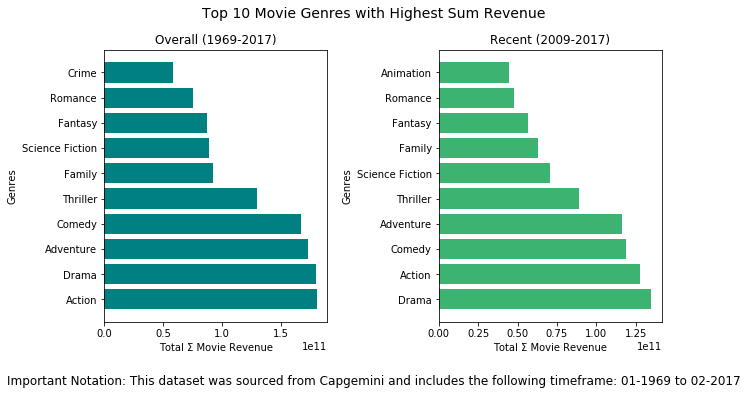

In [42]:
plot_top_25_feature_revenue(0)

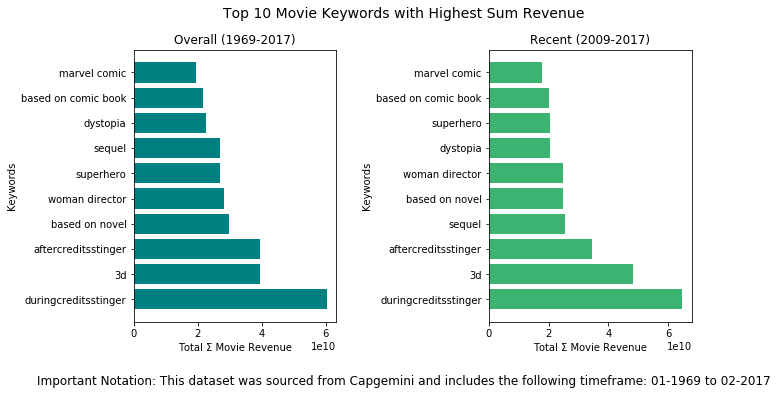

In [43]:
plot_top_25_feature_revenue(1, 0.75)

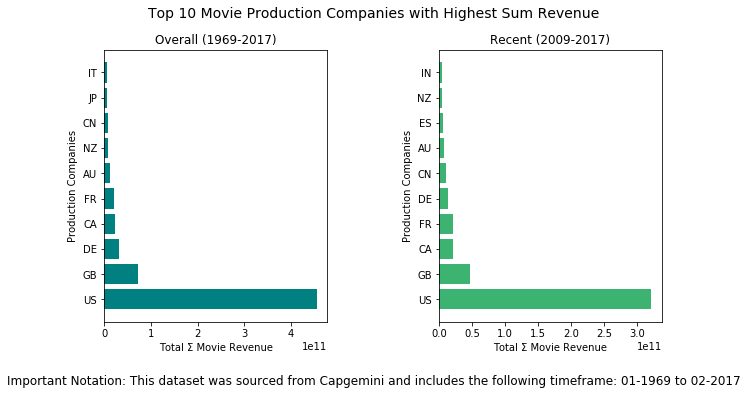

In [44]:
plot_top_25_feature_revenue(2)

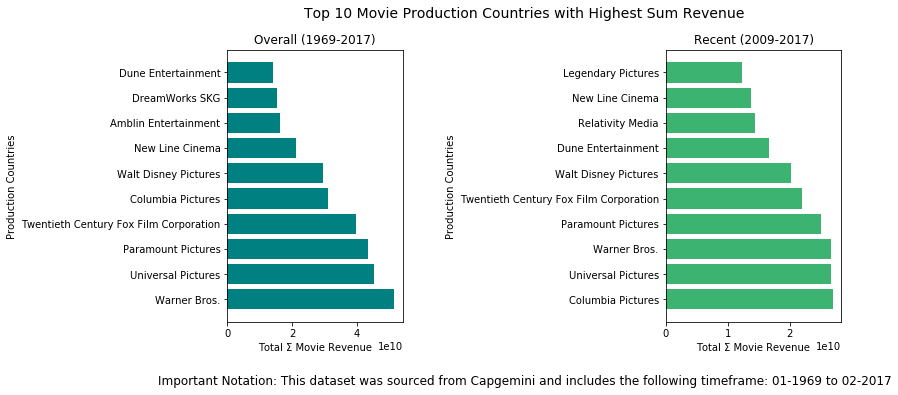

In [45]:
plot_top_25_feature_revenue(3, 1.5, (11,5))

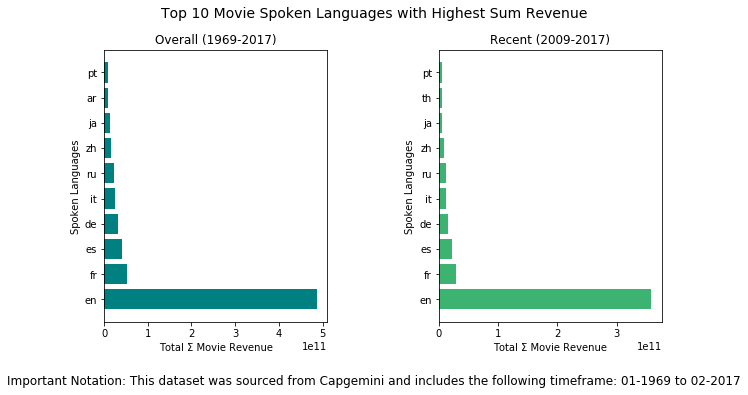

In [46]:
plot_top_25_feature_revenue(4)